In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,MaxPool1D,Flatten,Conv2D,Dropout,MaxPooling2D
import multiprocessing
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv', dtype = np.uint8)

In [5]:
df

,65,66,80,74,76,78,73,65.1,54,58,...,77.38,72.43,68.44,63.30,64.54,70.37,83.24,88.29,92.18,1
0,66,59,51,35,41,59,67,72,68,63,...,81,87,83,88,73,79,81,85,89,0
1,101,102,83,100,104,105,106,98,112,85,...,49,54,52,57,71,65,66,74,70,1
2,109,112,111,112,112,111,110,111,110,108,...,99,98,95,99,90,88,78,79,77,0
3,108,111,111,108,108,107,106,109,116,116,...,103,108,106,105,103,106,104,103,107,0
4,70,68,63,75,78,69,60,60,59,82,...,110,107,105,86,76,82,93,111,112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144959,73,76,78,77,78,81,81,79,80,77,...,120,138,147,140,115,103,103,102,107,0
144960,59,61,62,58,56,59,56,60,73,83,...,89,87,85,82,82,87,89,92,90,1
144961,75,82,78,89,87,87,81,80,79,82,...,82,81,82,83,81,82,74,77,87,0
144962,191,90,38,44,43,45,47,39,55,70,...,34,25,26,29,45,36,34,34,42,1


In [24]:
X,Y = df.drop(df.columns[df.shape[1] - 1], axis = 1), df[df.columns[df.shape[1] - 1]]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [26]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [59]:
model1 = Sequential()
model1.add(Reshape((70,70,1), input_shape = (4900,)))
model1.add(MaxPool2D(pool_size=(3,3), padding='valid'))
model1.add(Flatten())
model1.add(Dense(150, activation='relu'))
model1.add(Dense(90, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_15 (Reshape)        (None, 70, 70, 1)         0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 23, 23, 1)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 529)               0         
                                                                 
 dense_54 (Dense)            (None, 150)               79500     
                                                                 
 dense_55 (Dense)            (None, 90)                13590     
                                                                 
 dense_56 (Dense)            (None, 30)                2730      
                                                     

In [60]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = model1.fit(np.expand_dims(x_train,axis=-1),y_train,batch_size=200,epochs=100,
                    validation_split=0.15,
                    use_multiprocessing=True,workers=multiprocessing.cpu_count(),callbacks=[callback])

Epoch 1/100
493/493 [==============================] - 10s 20ms/step - loss: 0.7467 - accuracy: 0.8889 - val_loss: 0.2220 - val_accuracy: 0.9242
Epoch 2/100
493/493 [==============================] - 12s 24ms/step - loss: 0.1996 - accuracy: 0.9310 - val_loss: 0.1617 - val_accuracy: 0.9422
Epoch 3/100
493/493 [==============================] - 13s 27ms/step - loss: 0.1812 - accuracy: 0.9349 - val_loss: 0.1604 - val_accuracy: 0.9431
Epoch 4/100
493/493 [==============================] - 14s 28ms/step - loss: 0.1584 - accuracy: 0.9434 - val_loss: 0.1587 - val_accuracy: 0.9438
Epoch 5/100
493/493 [==============================] - 13s 27ms/step - loss: 0.1575 - accuracy: 0.9440 - val_loss: 0.1450 - val_accuracy: 0.9480
Epoch 6/100
493/493 [==============================] - 14s 27ms/step - loss: 0.1530 - accuracy: 0.9448 - val_loss: 0.1407 - val_accuracy: 0.9503
Epoch 7/100
493/493 [==============================] - 13s 27ms/step - loss: 0.3443 - accuracy: 0.9031 - val_loss: 0.1719 - val_ac

493/493 [==============================] - 18s 37ms/step - loss: 0.0726 - accuracy: 0.9750 - val_loss: 0.0990 - val_accuracy: 0.9706
Epoch 58/100
493/493 [==============================] - 20s 40ms/step - loss: 0.0720 - accuracy: 0.9746 - val_loss: 0.1066 - val_accuracy: 0.9691
Epoch 59/100
493/493 [==============================] - 18s 37ms/step - loss: 0.0734 - accuracy: 0.9740 - val_loss: 0.1018 - val_accuracy: 0.9715
Epoch 60/100
493/493 [==============================] - 18s 36ms/step - loss: 0.0722 - accuracy: 0.9755 - val_loss: 0.1008 - val_accuracy: 0.9667
Epoch 61/100
493/493 [==============================] - 16s 32ms/step - loss: 0.0713 - accuracy: 0.9757 - val_loss: 0.1000 - val_accuracy: 0.9706
Epoch 62/100
493/493 [==============================] - 15s 30ms/step - loss: 0.0724 - accuracy: 0.9753 - val_loss: 0.1102 - val_accuracy: 0.9683
Epoch 63/100
493/493 [==============================] - 16s 33ms/step - loss: 0.0696 - accuracy: 0.9758 - val_loss: 0.1177 - val_accuracy

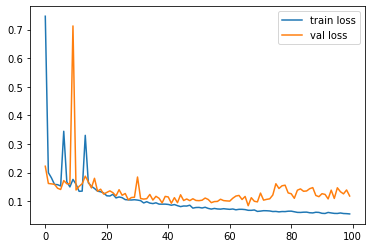

In [65]:
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.legend()

In [69]:
model2 = Sequential()
model2.add(Reshape((70,70,1), input_shape = (4900,)))
model2.add(Conv2D(10,(3,3), use_bias=True,padding="valid"))
model2.add(MaxPool2D(pool_size=(3,3), padding='valid'))
model2.add(Dropout(0.1))
model2.add(Conv2D(1,(3,3), use_bias=True,padding="valid"))
model2.add(MaxPool2D(pool_size=(3,3), padding='valid'))
model2.add(Flatten())
model2.add(Dense(500, activation='relu'))
model2.add(Dense(300, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_19 (Reshape)        (None, 70, 70, 1)         0         
                                                                 
 conv2d_33 (Conv2D)          (None, 68, 68, 10)        100       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 22, 22, 10)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 22, 22, 10)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 20, 20, 1)         91        
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 1)          0         
 g2D)                                                

In [70]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = model2.fit(np.expand_dims(x_train,axis=-1),y_train,batch_size=200,epochs=100,
                    validation_split=0.15,
                    use_multiprocessing=True,workers=multiprocessing.cpu_count(),callbacks=[callback])

Epoch 1/100
493/493 [==============================] - 116s 233ms/step - loss: 0.3857 - accuracy: 0.8633 - val_loss: 0.3765 - val_accuracy: 0.8820
Epoch 2/100
493/493 [==============================] - 140s 285ms/step - loss: 0.1992 - accuracy: 0.9256 - val_loss: 0.2772 - val_accuracy: 0.9156
Epoch 3/100
493/493 [==============================] - 181s 367ms/step - loss: 0.1671 - accuracy: 0.9399 - val_loss: 0.1799 - val_accuracy: 0.9366
Epoch 4/100
493/493 [==============================] - 181s 368ms/step - loss: 0.1453 - accuracy: 0.9471 - val_loss: 0.1494 - val_accuracy: 0.9448
Epoch 5/100
493/493 [==============================] - 149s 301ms/step - loss: 0.1306 - accuracy: 0.9525 - val_loss: 0.1198 - val_accuracy: 0.9591
Epoch 6/100
493/493 [==============================] - 144s 291ms/step - loss: 0.1187 - accuracy: 0.9569 - val_loss: 0.1117 - val_accuracy: 0.9604
Epoch 7/100
493/493 [==============================] - 141s 287ms/step - loss: 0.1117 - accuracy: 0.9596 - val_loss: 0

Epoch 57/100
493/493 [==============================] - 86s 175ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0963 - val_accuracy: 0.9794
Epoch 58/100
493/493 [==============================] - 90s 182ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0865 - val_accuracy: 0.9801
Epoch 59/100
493/493 [==============================] - 87s 176ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0881 - val_accuracy: 0.9799
Epoch 60/100
493/493 [==============================] - 87s 177ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0884 - val_accuracy: 0.9802
Epoch 61/100
493/493 [==============================] - 88s 179ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0851 - val_accuracy: 0.9798
Epoch 62/100
493/493 [==============================] - 88s 179ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0953 - val_accuracy: 0.9790
Epoch 63/100
493/493 [==============================] - 88s 178ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0

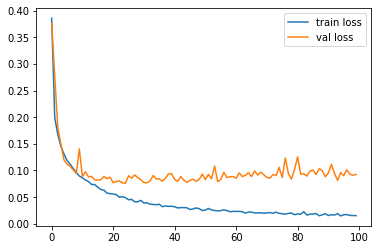

In [72]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

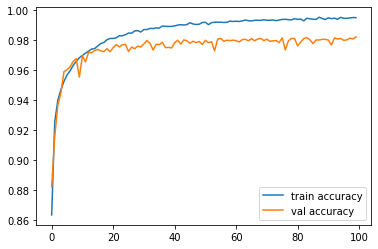

In [74]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()

In [75]:
model2.save('cnnModel_98.23')

INFO:tensorflow:Assets written to: cnnModel_98.23\assets
